##Principal Component Analysis Dataset Adult/Cencus Income

Nama: Divia Shinta Sukarsaatmadja

NIM : 24060121140104

Lab : ML A1

###Deskripsi Dataset

Pada tugas praktikum *machine learning* ini, saya memilih dataset "Adult/Cencus Income" yang bersumber dari Kaggle.

Dataset ini merupakan hasil ekstraksi yang dilakukan oleh Barry Becker dari database Sensus 1994. Satu set catatan yang cukup bersih diekstraksi menggunakan kondisi berikut: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)). Dataset ini digunakan untuk membuat prediksi apakah seseorang menghasilkan pendapatan melebihi $50K/tahun berdasarkan data sensus.

Informasi detail mengenai dataset ini dapat diakses melalui [tautan berikut.](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset/data)


###Load Dataset

In [83]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

- pandas digunakan untuk manipulasi data dan analisis.
- matplotlib.pylab digunakan untuk membuat plot dan visualisasi data.
- StandardScaler dari sklearn.preprocessing digunakan untuk penskalaan fitur dengan menghapus mean dan menskalakan ke varians unit.
- PCA dari sklearn.decomposition digunakan untuk mereduksi dimensi data.

In [84]:
df=pd.read_csv('/content/sample_data/adult/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


- Fungsi pd.read_csv() digunakan untuk membaca file CSV dan mengubahnya menjadi DataFrame pandas.
- Metode head() kemudian digunakan untuk menampilkan 5 baris pertama dari DataFrame tersebut.

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


- Fungsi df.info() digunakan untuk mendapatkan ringkasan singkat tentang DataFrame.

###Standarisasi Data

In [86]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Tentukan kolom numerik dan kategorikal
numeric_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

# Buat pipeline untuk kedua jenis fitur
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Gabungkan kedua transformer dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Sekarang kita bisa fit dan transform data kita
x = preprocessor.fit_transform(df)
y = df.loc[:, ['income']].values


- Pendefinisian Fitur: mendefinisikan fitur numerik dan kategorikal dari dataset.

- Pembuatan Pipeline: membuat dua pipeline, satu untuk fitur numerik dan satu untuk fitur kategorikal. Pipeline fitur numerik menggunakan StandardScaler untuk menskalakan fitur numerik, sedangkan pipeline fitur kategorikal menggunakan OneHotEncoder untuk mengubah fitur kategorikal menjadi representasi numerik.

- Penggabungan Transformer: menggabungkan kedua pipeline tersebut dalam ColumnTransformer. Ini akan menerapkan transformasi yang sesuai pada setiap kolom sesuai dengan jenisnya (numerik atau kategorikal).

- Transformasi Data: kemudian menggunakan ColumnTransformer untuk mengubah dataset, menghasilkan array x yang berisi fitur yang telah ditransformasi.

- Ekstraksi Target: mengekstrak kolom target 'income' dari dataset dan menyimpannya dalam array y.

###Proyeksi PCA ke 2D

In [87]:
from sklearn.decomposition import PCA

# Ubah matriks sparse menjadi dense
x_dense = x.toarray()

# Buat objek PCA dengan 2 komponen
pca = PCA(n_components=2)

# Lakukan proyeksi PCA
principalComponents = pca.fit_transform(x_dense)

# Ubah ke DataFrame untuk kemudahan visualisasi
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

print(principalDf.head())

   principal component 1  principal component 2
0              -1.564280              -0.021758
1               0.621012              -0.779591
2               0.189242               0.792861
3               0.736472              -0.334072
4              -1.762881               0.954394


Kode diatas mereduksi dimensi data menjadi 2 dimensi menggunakan PCA dan menampilkan 5 baris pertama dari data yang telah ditransformasi.
- x_dense = x.toarray(): Mengubah matriks sparse menjadi dense. Ini diperlukan karena PCA tidak dapat bekerja dengan matriks sparse.

- pca = PCA(n_components=2): Membuat objek PCA dengan 2 komponen. Ini berarti melakukan reduksi data menjadi 2 dimensi.

- principalComponents = pca.fit_transform(x_dense): Melakukan proyeksi PCA pada data. Hasilnya adalah array 2D di mana setiap baris adalah sampel dan setiap kolom adalah komponen utama.

- principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2']): Mengubah array hasil PCA menjadi DataFrame untuk kemudahan visualisasi dan manipulasi data.

- print(principalDf.head()): Menampilkan 5 baris pertama dari DataFrame yang telah ditransformasi.

In [88]:
finalDf = pd.concat([principalDf, df[['income']]], axis=1)

Kode diatas menggabungkan DataFrame principalDf (yang berisi komponen utama dari PCA) dengan kolom 'income' dari DataFrame asli df.
- Fungsi pd.concat() digunakan untuk menggabungkan DataFrame sepanjang sumbu tertentu (axis=1 berarti menggabungkan sepanjang kolom).
- Hasilnya adalah DataFrame baru finalDf yang berisi komponen utama dari PCA dan kolom target 'income'.

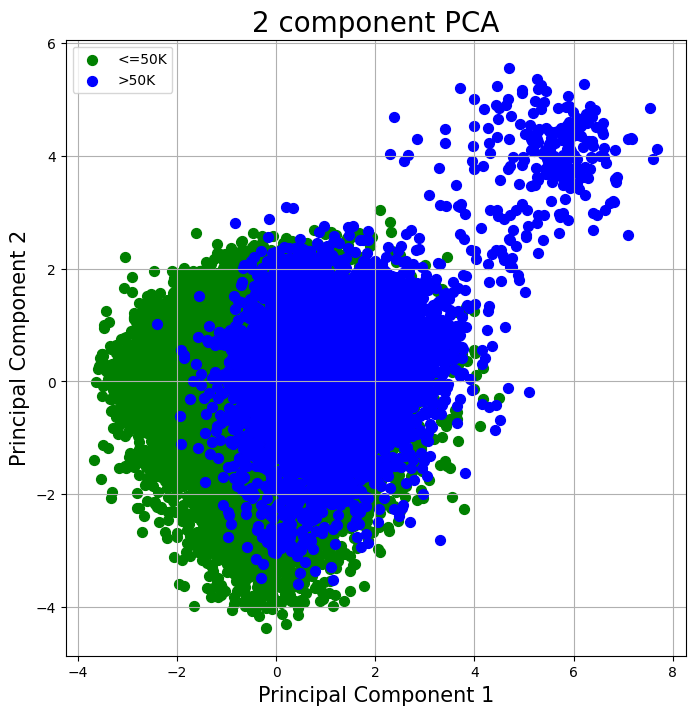

In [89]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['<=50K', '>50K']
colors = ['g', 'b']
for target, color in zip(targets,colors):
  indicesToKeep = finalDf['income'] == target
  ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
             , finalDf.loc[indicesToKeep, 'principal component 2']
             , c = color
             , s = 50)
ax.legend(targets)
ax.grid()

Kode diatas digunakan untuk membuat plot scatter dari dua komponen utama PCA dengan warna yang berbeda untuk setiap kategori target.

- fig = plt.figure(figsize = (8,8)) dan ax = fig.add_subplot(1,1,1): Membuat figure dan axes untuk plot.

- ax.set_xlabel('Principal Component 1', fontsize = 15) dan ax.set_ylabel('Principal Component 2', fontsize = 15): Menetapkan label untuk sumbu x dan y.

- ax.set_title('2 component PCA', fontsize = 20): Menetapkan judul untuk plot.

- targets = ['<=50K', '>50K'] dan colors = ['g', 'b']: Menentukan target dan warna untuk setiap kategori dalam data.

- Loop for target, color in zip(targets,colors): Untuk setiap target dan warna, plot data yang sesuai pada plot.

- ax.legend(targets) dan ax.grid(): Menambahkan legenda dan grid ke plot.

###Varians yang Dijelaskan

In [90]:
pca.explained_variance_ratio_

array([0.14848178, 0.1080561 ])

- pca.explained_variance_ratio_ mengembalikan array yang berisi persentase varians yang dijelaskan oleh masing-masing komponen utama yang dipilih dalam PCA. Nilai ini menunjukkan seberapa banyak informasi atau varians dalam data asli yang dapat dijelaskan oleh setiap komponen utama.
- Berdasarkan output diatas, komponen utama pertama menjelaskan sekitar 14.8% varians dalam data, dan komponen utama kedua menjelaskan sekitar 10.8% varians. Jadi, kedua komponen utama ini bersama-sama menjelaskan sekitar 25.6% varians total dalam data.


###Kesimpulan

Berdasarkan tugas ini, saya telah melakukan beberapa langkah penting dalam analisis data menggunakan Principal Component Analysis (PCA):

1. **Pra-pemrosesan Data**: melakukan pra-pemrosesan data dengan mengubah fitur kategorikal menjadi numerik menggunakan OneHotEncoder dan menskalakan fitur numerik menggunakan StandardScaler.

2. **Implementasi PCA**: mereduksi dimensi data menjadi 2 dimensi menggunakan PCA. Ini dilakukan dengan mengubah matriks sparse menjadi dense dan kemudian menerapkan PCA.

3. **Visualisasi Hasil PCA**: membuat plot scatter dari dua komponen utama PCA, dengan warna yang berbeda untuk setiap kategori target.

4. **Evaluasi Hasil PCA**: mengevaluasi hasil PCA dengan melihat varians yang dijelaskan oleh masing-masing komponen utama. Dalam hal ini, komponen utama pertama menjelaskan sekitar 14.8% varians dalam data, dan komponen utama kedua menjelaskan sekitar 10.8% varians.
